# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# Giving Google Colab access to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the csv file from Drive into Colab using read_csv function
df = pd.read_csv('/content/drive/My Drive/PG Data Science and Business Analysis/Project 1: FoodHub/foodhub_order.csv')

# Looking at the first 5 rows of the dataset
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

- The Dataset has been loaded properly. It consists on 9 columns as mentioned in the Data Dictionary.
- Each column displays information attributed to the order placed by customers. Orders placed by each customer are displayed in rows.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# To check the number of rows and columns
df.shape

(1898, 9)

In [ ]:
# Checking for duplicated entries
df.duplicated().sum()

0

#### Observations:
- The dataset has 1898 rows with 9 columns.
- There are no duplicated entries in the data.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Using info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
# Changing the data type of customer_id to a categorical value since Python interpreted it as numerical
df['customer_id'] = pd.Categorical(df['customer_id'])

In [ ]:
# To find out why the column 'rating' is an object Data type
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [ ]:
# Checking that data types have changed correctly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   category
 2   restaurant_name        1898 non-null   object  
 3   cuisine_type           1898 non-null   object  
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   object  
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(1), float64(1), int64(3), object(4)
memory usage: 164.1+ KB


#### Observations:
- There were 5 numerical columns and 4 object columns. After changing customer_id to a categorical value, there are 4 numerical columns, 4 object columns, and 1 categorical column.
- All columns have 1898 values entered. We can infer that there are no null values in the dataset
- customer_id was interpreted as a numerical value. However, it is a specific value for each customer so it should be considered categorical.
- Rating given by the customer is interpreted as object type. Looking at the unique value types in the rating column, we see that 'Not given' was entered for some of the orders.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# To find out if there are any missing values in the Dataset
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
- There are no missing values in the dataset.
- Some of the orders have not been rated and a value of 'Not given' was entered. We will treat them as is.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# To get the statistical summary of the data that includes all columns and displays the column names in the dataset as rows
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,1200.0,52832.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:
- The table displays a descriptive analysis of all columns.
- The minimum time it takes for food to be prepared is 20 minutes. The maximum is 35 minutes, and the average time is about 27 minutes. The mean and median of preparation time is very close, which can infer a symmetrical distribution.
- It takes almost the same amount of time to deliver the food as it takes to prepare the food.
- Around 71% of the orders are placed on the weekend (Saturday or Sunday).
- 736 orders didn't receive a rating and it comprises 39% of the orders without a rating.
- Shake Shack is the most common restaurant where customers order food with a percentage of around 12% of orders being from Shake Shack.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Looking at the rated orders
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [ ]:
# Looking at the percentage of the orders not rated
df['rating'].value_counts(normalize=True)

Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: rating, dtype: float64

#### Observations:
- 736 orders are not rated and were categorized as 'Not given' in the dataset.
- The orders not rated comprise around 39% of the total of orders.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

**Observations on order ID**

In [ ]:
# Checking that there is a singular order id assigned in each row
df['order_id'].value_counts()

1477147    1
1477697    1
1477555    1
1478028    1
1478308    1
          ..
1478087    1
1476775    1
1478421    1
1476774    1
1478056    1
Name: order_id, Length: 1898, dtype: int64

- We will not visualize the data for order_id since it is a unique value assigned to each independent order.
- There are a total of 1898 different order ids, which matches the total number of rows.

**Observations on customer ID**

In [ ]:
# Looking at the total number of customer_id present in the data
df['customer_id'].value_counts()

52832     13
47440     10
83287      9
250494     8
65009      7
          ..
105903     1
105992     1
106006     1
106324     1
405334     1
Name: customer_id, Length: 1200, dtype: int64

In [ ]:
# To calculate the number of occurrences of 1 order
df['customer_id'].value_counts().tail(785)

344079    2
186976    1
180618    1
378923    1
400390    1
         ..
105903    1
105992    1
106006    1
106324    1
405334    1
Name: customer_id, Length: 785, dtype: int64

- There are a total of 1200 customers in the data set.
- customer_id 52832 is the most common customer with a total of 13 orders.
- 784 of the customers only ordered 1 time, making up around 41% of the customers only ordering once.
- We will not create a visual for customer_id.

**Observations on restaurant name**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


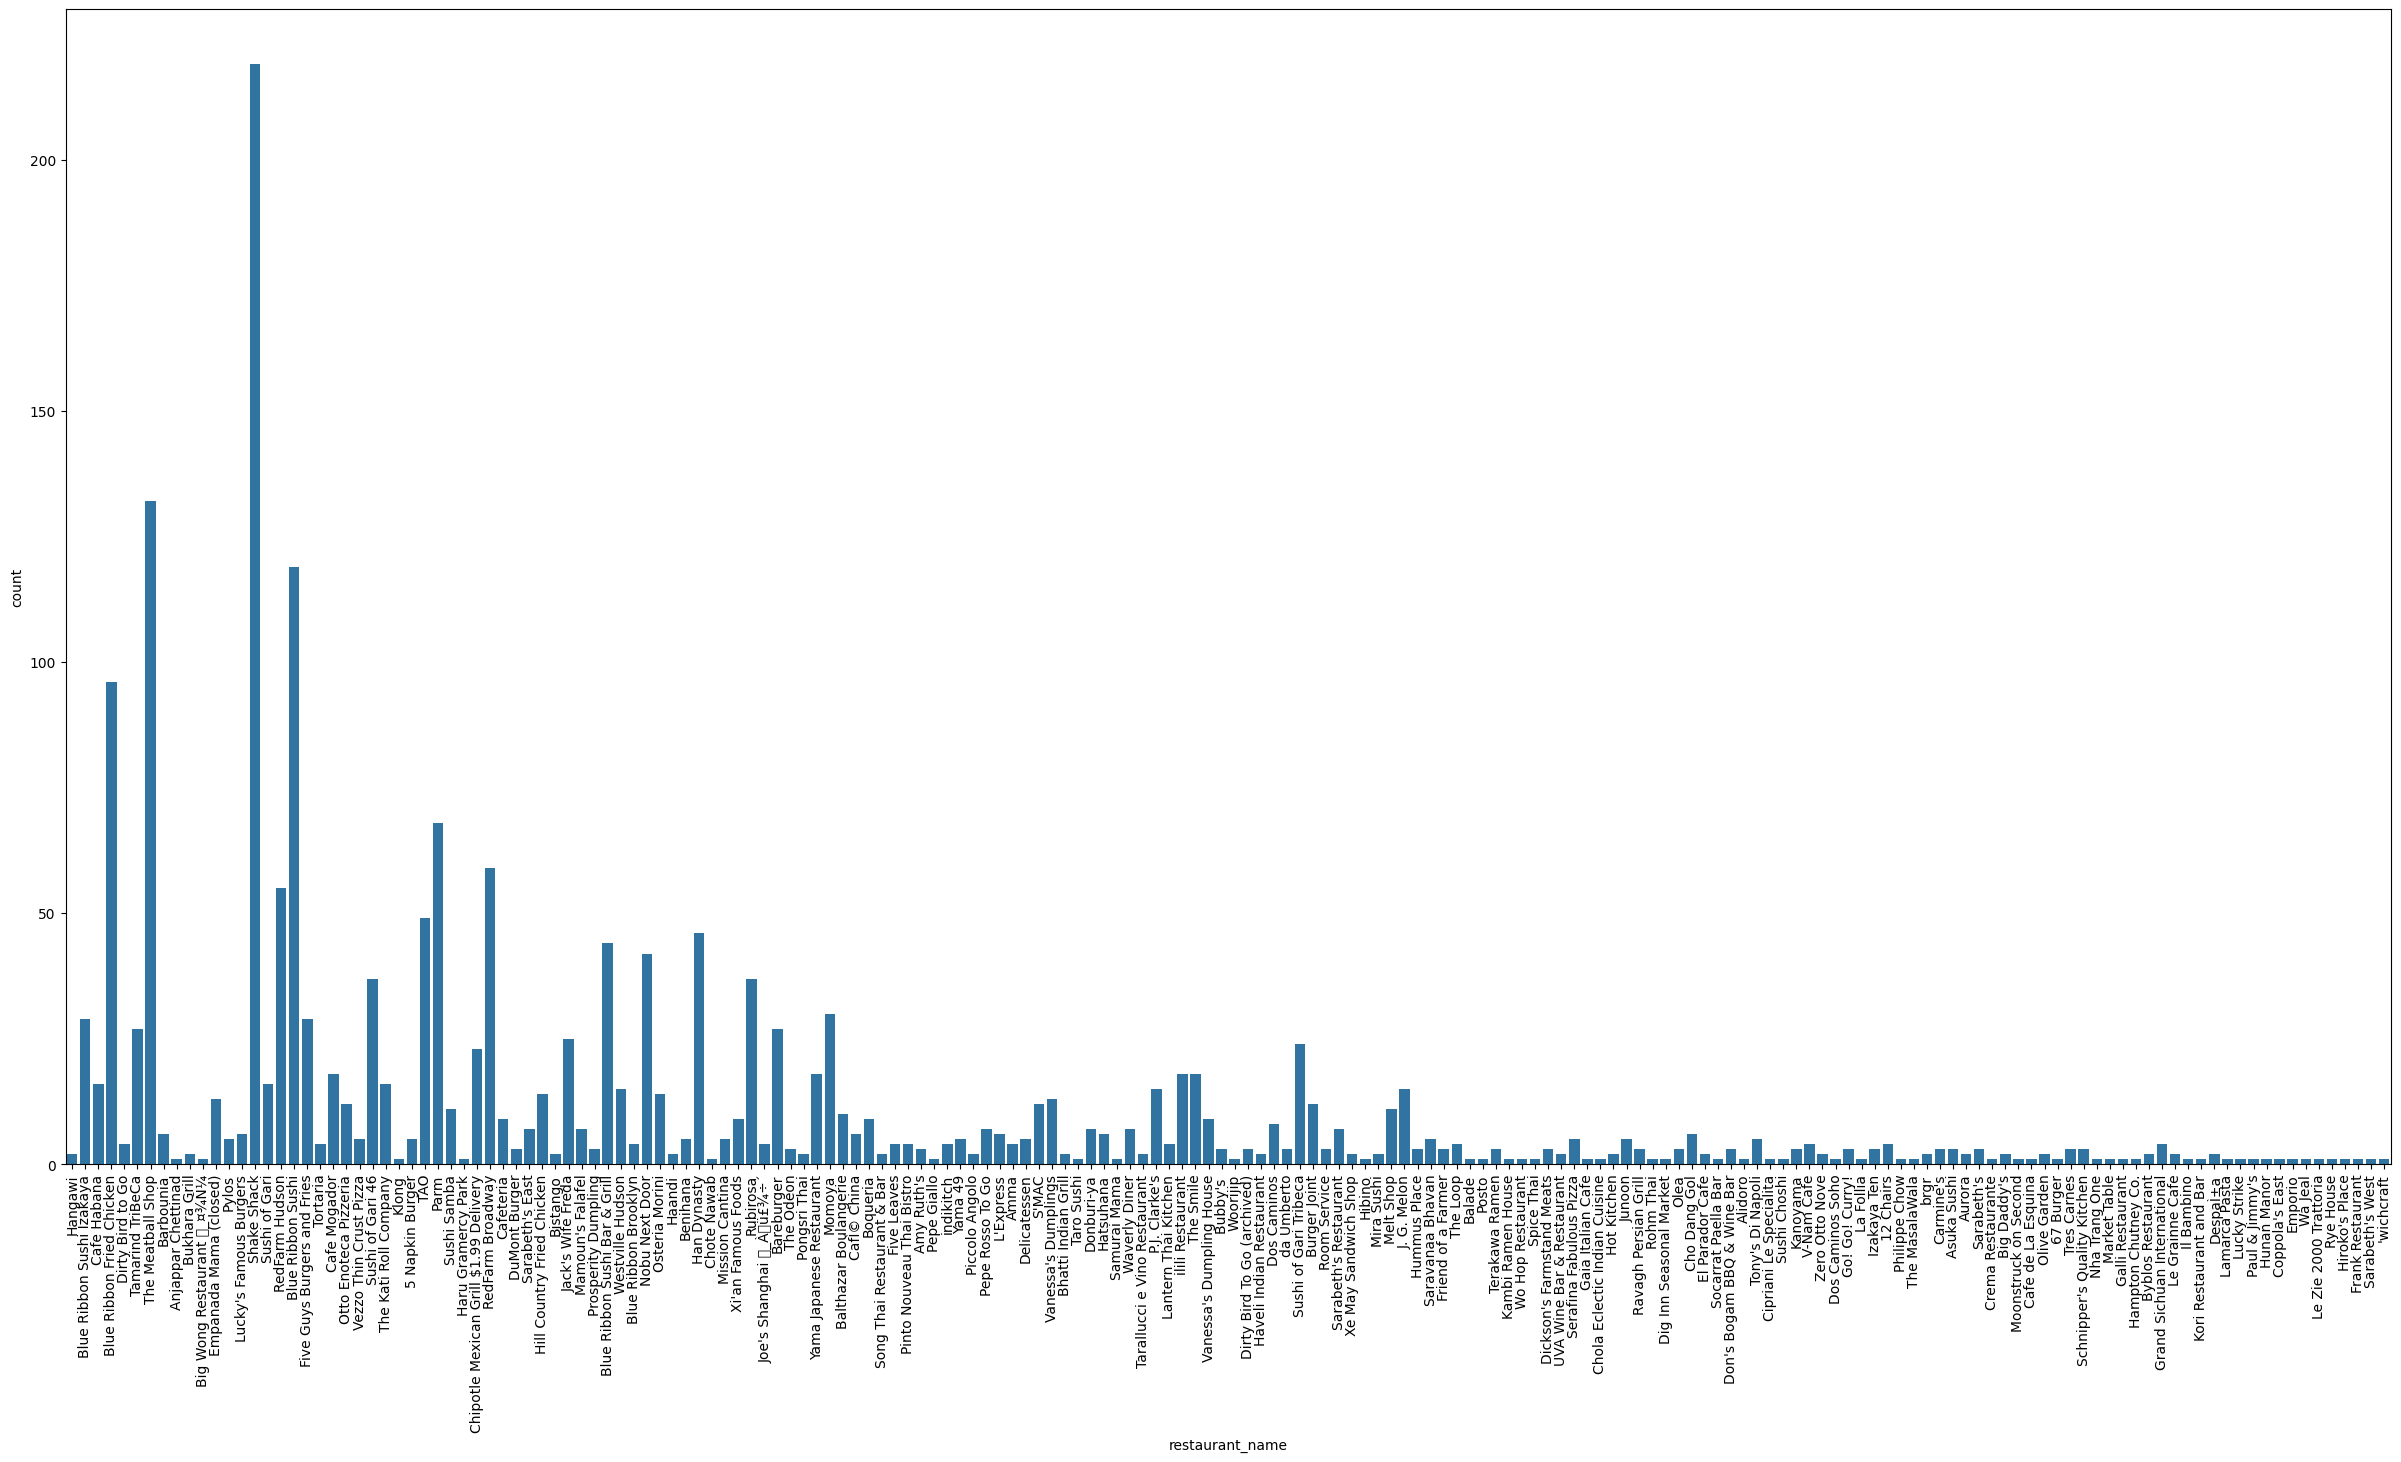

In [ ]:
# Visual for restaurant_name
plt.figure(figsize=(30,15))
sns.countplot(data=df,x='restaurant_name')
plt.xticks(rotation=90)
plt.show()

- The most popular restaurant is Shake Shack with more than 200 orders placed.
- The Meatball Shop and Blue Ribbon Sushi have over 100 orders.
- Followed by Blue Ribbon Fried Chicken with almost a 100 orders.
- Most of the restaurants have few orders, usually less than 20.

**Observations on cuisine type**

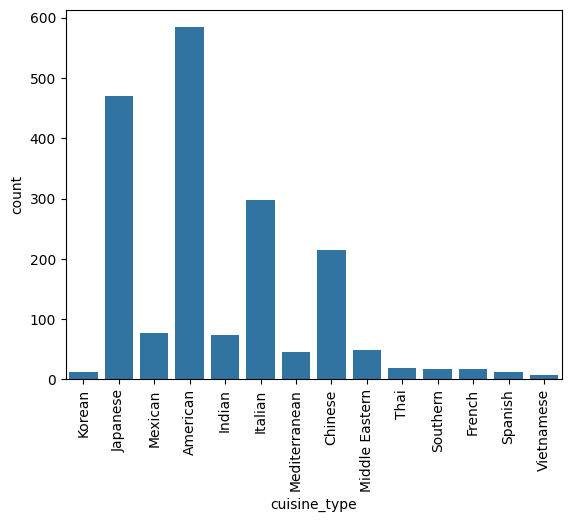

In [ ]:
# Visual on cuisine_type
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation=90);

- The most common cuisine type is American with almost 600 of the total orders being of this type of food.
- The next most common cuisine types are Japanese with almost 500 orders and italian with about 300 of the total orders.
- The least common cuisine types are Vietnamese, Spanish, Southern, and Korean.

**Observations on cost of the order**

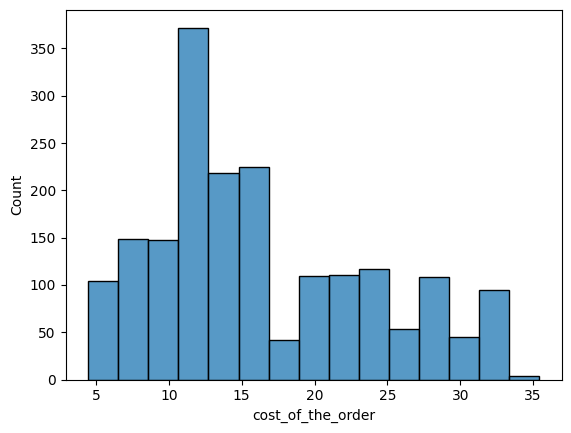

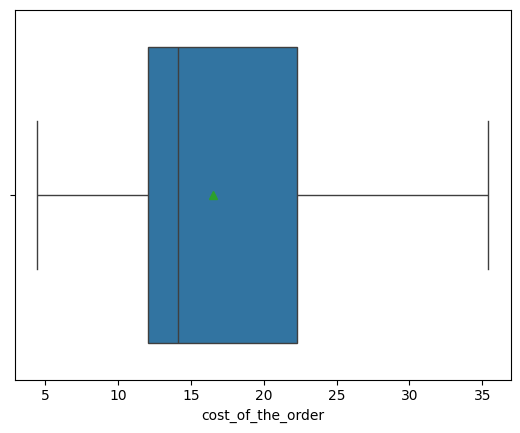

In [ ]:
# Visuals on numerical data for cost of the order
sns.histplot(data=df,x='cost_of_the_order',bins=15)
plt.show()
sns.boxplot(data=df,x='cost_of_the_order',showmeans=True)
plt.show()

- Most of the orders (over 350) cost around 12 dollars. Only a few orders cost more than 33 dollars.
- There are no outliers in the cost of the order. All the orders cost around 5 dollars to 35 dollars.
- 50% of orders cost between 11 and 23. And more than 50% of the orders cost more than 14.

**Observations on day of the week**

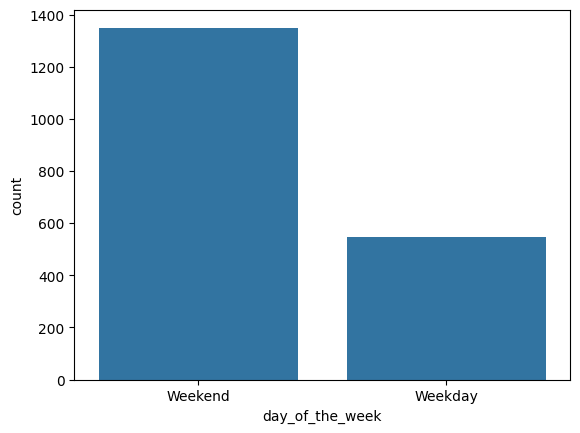

In [ ]:
# Visual on orders placed based on the day of the week
sns.countplot(data=df,x='day_of_the_week');

In [ ]:
# Looking at the percentages of orders placed on weekdays and weekends
df.value_counts('day_of_the_week',normalize=True)

day_of_the_week
Weekend    0.711802
Weekday    0.288198
dtype: float64

- Almost 1400 orders are placed on the weekend, comprising about 71% of the total orders.
- Less than 600 orders are placed during the week, consisting on about 29% of the total orders.

**Observations on rating of the food**

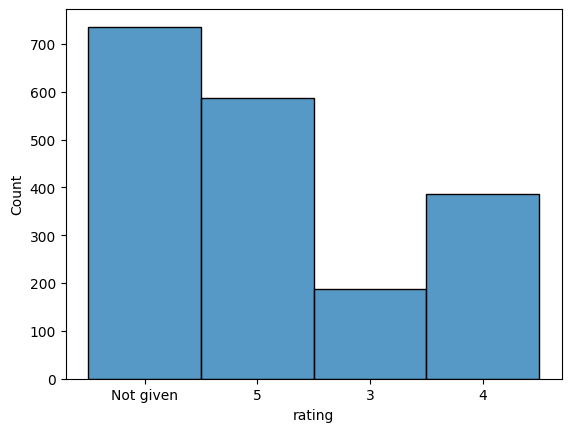

In [ ]:
# Visuals on numerical data of rating
sns.histplot(data=df,x='rating')
plt.show()

- More than 700 orders didn't receive a rating.
- No order received a rating lower than a 3.
- From the orders that have a rating, almost 600 orders received a 5.
- Less than 200 orders received a rating of 3. And About 400 orders received a 4.


**Observations on preparation time in minutes**

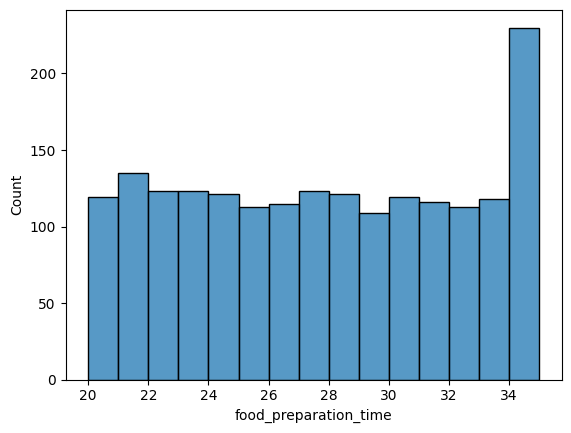

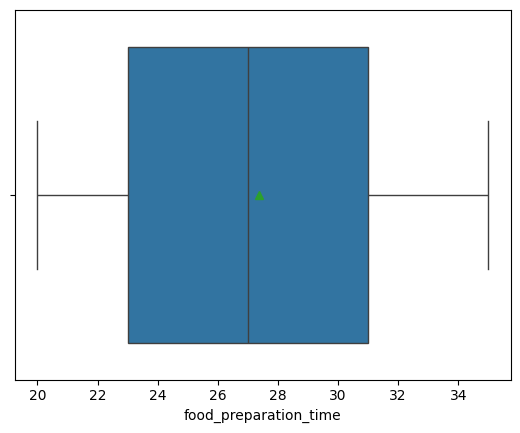

In [ ]:
# Visuals on preparation time
sns.histplot(data=df,x='food_preparation_time',bins=15)
plt.show()
sns.boxplot(data=df, x='food_preparation_time',showmeans=True)
plt.show()

- All the orders take between 20 and 35 minutes to prepare. There are no outliers in the data.
- Most of the food, almost 250 of the orders, take between 34 and 35 minutes to prepare.
- The median minutes to prepare the orders is about 27 minutes.
- 25% of the food takes less than 23 minutes. 25% of the orders take more than 31 minutes to prepare.


**Observations on delivery time in minutes**

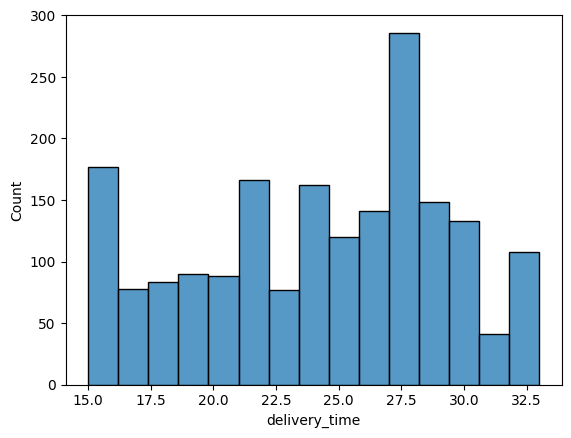

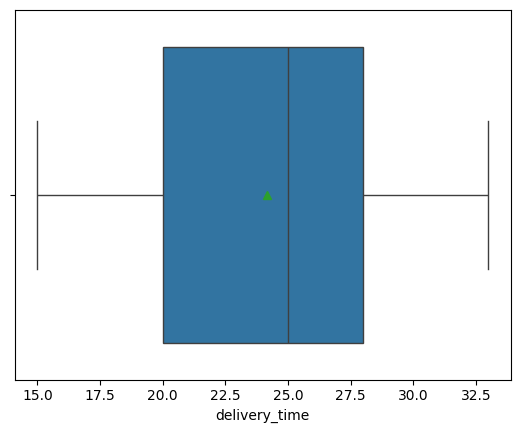

In [ ]:
# Visuals on delivery time
sns.histplot(data=df,x='delivery_time',bins=15)
plt.show()
sns.boxplot(data=df,x='delivery_time',showmeans=True)
plt.show()

- Orders take between 15 and 33 minutes to deliver.
- Most of the orders, almost 300 of the total orders, take between 27 and 28 minutes to deliver.
- 50% of the orders take between 20 and 28 minutes to deliver. 25% of the orders deliver in less than 20 minutes and 25% deliver in more than 28 minutes.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Looking at the top 5 restaurants and the quantity of orders
df['restaurant_name'].value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
- The most common restaurant is Shake Shack with 219 orders
- The Meatball Shop and Blue Ribbon Sushi both have more than a 100 orders.
- Followed by Blue Ribbon Fried Chicken with 96 orders placed and Parm with 68 orders.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# To create a dataset where only the rows that contain Weekend are included from the day_of_the_week
data=df[df['day_of_the_week']=='Weekend']

# Getting the number of occurrences of each cuisine type in the dataset where only Weekened orders are conisdered
data['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

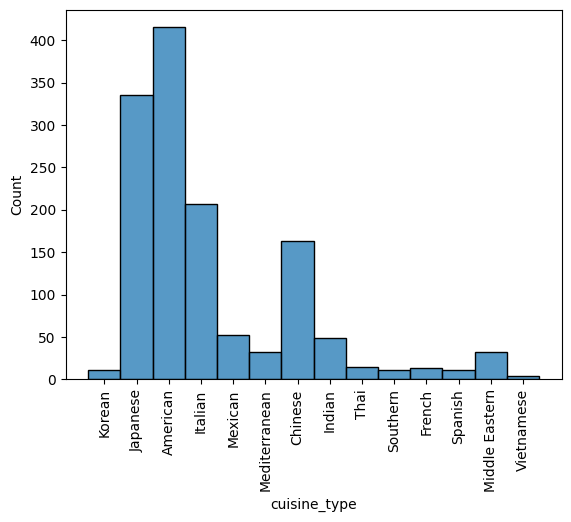

In [ ]:
sns.histplot(data=data,x='cuisine_type')
plt.xticks(rotation=90);

#### Observations:
- The most popular cuisine on the weekends is American with a total of 415 orders being of this type of cuisine.
- The next most popular cuisine type is Japanese with 335 orders.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Looking at the rows where the cost is greater than 20 dollars
df[df['cost_of_the_order']>20]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17
17,1477373,139885,Blue Ribbon Sushi Izakaya,Japanese,33.03,Weekend,Not given,21,22
...,...,...,...,...,...,...,...,...,...
1884,1477437,304993,Shake Shack,American,31.43,Weekend,3,31,24
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17


In [ ]:
# Printing the shape of the dataset where the cost is more than 20 dollars
df[df['cost_of_the_order']>20].shape

(555, 9)

In [ ]:
# Printing the shape of the entire dataset
df.shape

(1898, 9)

#### Observations:
- 555 out of the 1898 orders cost more than 20 dollars.
- Around 29% of the orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Looking at the mean delivery time
df['delivery_time'].mean()

24.161749209694417

#### Observations:
- On average, food takes around 24 minutes to deliver.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Finding the top 3 most frequent customers and their IDs
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

In [ ]:
# Looking at the order information for the most frequent customer
df.loc[df['customer_id']==52832]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
247,1478179,52832,Han Dynasty,Chinese,12.23,Weekend,3,33,27
272,1477314,52832,ilili Restaurant,Middle Eastern,9.46,Weekday,4,25,25
517,1476916,52832,Dickson's Farmstand Meats,American,15.72,Weekend,4,23,28
526,1478160,52832,Donburi-ya,Japanese,15.86,Weekday,5,28,28
632,1478265,52832,Dos Caminos,Mexican,16.06,Weekend,Not given,35,19
670,1477302,52832,Don's Bogam BBQ & Wine Bar,Korean,12.23,Weekend,Not given,32,20
855,1477041,52832,Junoon,Indian,25.17,Weekday,Not given,23,24
1039,1477013,52832,Donburi-ya,Japanese,8.01,Weekday,5,30,30
1070,1476828,52832,Donburi-ya,Japanese,6.64,Weekday,Not given,21,29
1105,1478245,52832,Junoon,Indian,29.49,Weekend,5,23,17


In [ ]:
# Looking at the orders from the second most frequent customer
df.loc[df['customer_id']==47440]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
264,1477909,47440,Blue Ribbon Fried Chicken,American,12.18,Weekend,Not given,31,23
398,1478120,47440,Blue Ribbon Fried Chicken,American,8.10,Weekend,Not given,33,22
579,1477178,47440,Bareburger,American,24.20,Weekend,4,23,23
674,1476982,47440,Bareburger,American,8.73,Weekend,5,21,19
778,1477481,47440,Bareburger,American,25.22,Weekday,3,31,27
807,1477594,47440,Bareburger,American,12.18,Weekday,3,25,24
824,1476854,47440,Blue Ribbon Fried Chicken,American,6.45,Weekend,4,30,24
1306,1476559,47440,Bareburger,American,15.57,Weekday,4,24,28
1359,1477903,47440,Bareburger,American,16.25,Weekend,Not given,32,28
1811,1477664,47440,Blue Ribbon Fried Chicken,American,29.30,Weekend,4,28,16


In [ ]:
# Looking at the third most frequent customer
df.loc[df['customer_id']==83287]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
103,1476564,83287,Five Guys Burgers and Fries,American,24.30,Weekend,5,30,20
663,1476673,83287,Blue Ribbon Sushi Izakaya,Japanese,9.51,Weekend,Not given,35,21
928,1476767,83287,Blue Ribbon Sushi Izakaya,Japanese,18.24,Weekend,5,32,22
1004,1477453,83287,Shake Shack,American,9.41,Weekend,5,22,20
1018,1478193,83287,Five Guys Burgers and Fries,American,16.01,Weekend,Not given,27,19
1091,1476812,83287,Shake Shack,American,9.02,Weekday,4,23,27
1310,1477358,83287,Boqueria,Spanish,14.50,Weekend,Not given,35,29
1465,1477258,83287,Blue Ribbon Sushi Izakaya,Japanese,29.10,Weekend,Not given,32,26
1617,1477628,83287,Blue Ribbon Sushi Izakaya,Japanese,9.22,Weekend,Not given,28,15


#### Observations:
- The most frequent customer has the id: 52832 and ordered 13 times.
- The second most frequent customer has id: 47440 and ordered 10 times.
- The third most frequent customer has id: 83287 and ordered 9 times.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


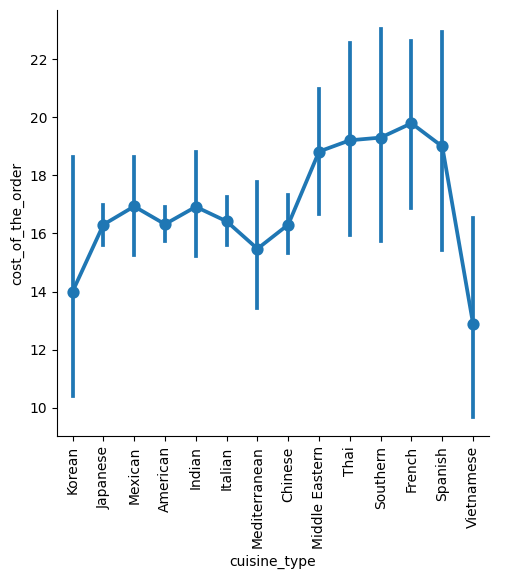

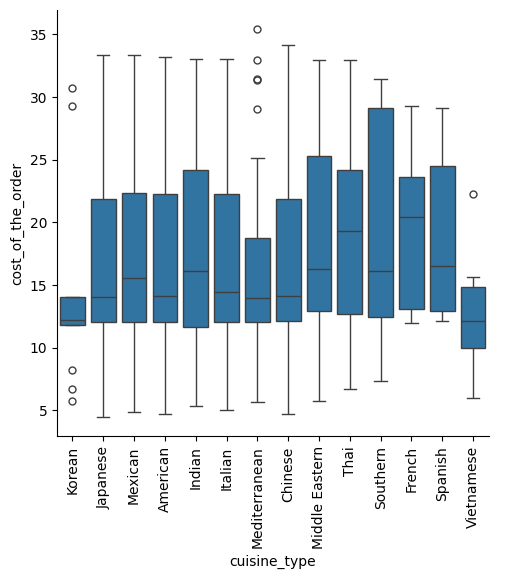

In [ ]:
# Looking at the cost of orders based on cuisine types
sns.catplot(data=df,x='cuisine_type',y='cost_of_the_order',kind='point')
plt.xticks(rotation=90)
plt.show()
sns.catplot(data=df, x='cuisine_type',y='cost_of_the_order',kind='box')
plt.xticks(rotation=90);

- On average Vietnamese food is the cheapest with an average cost of around 13 dollars. Vietnamese food has a big variation on cost, ranging around 5 to 16 dollars with a few outliers on the upper side.
- On average French food is the costliest with an average of 19 dollars and ranging between 12 and around 30 dollars.
- Chinese food has the biggest cost range between less than 5 and almost 35 dollars.
- Korean food has a few outliers on both ends, but all the rest of the orders cost between 11 and 19 dollars.

In [ ]:
# To turn the 'SettingWithCopyWarning' off since Google doesn't find it necessary anymore
pd.options.mode.copy_on_write = True

In [ ]:
# Creating a new dataframe dropping Not given values in the column rating
df_rated=df[df['rating'] != 'Not given']

# Changing data type in of rated orders in rating to numerical value
df_rated['rating'] = df_rated['rating'].astype(int)

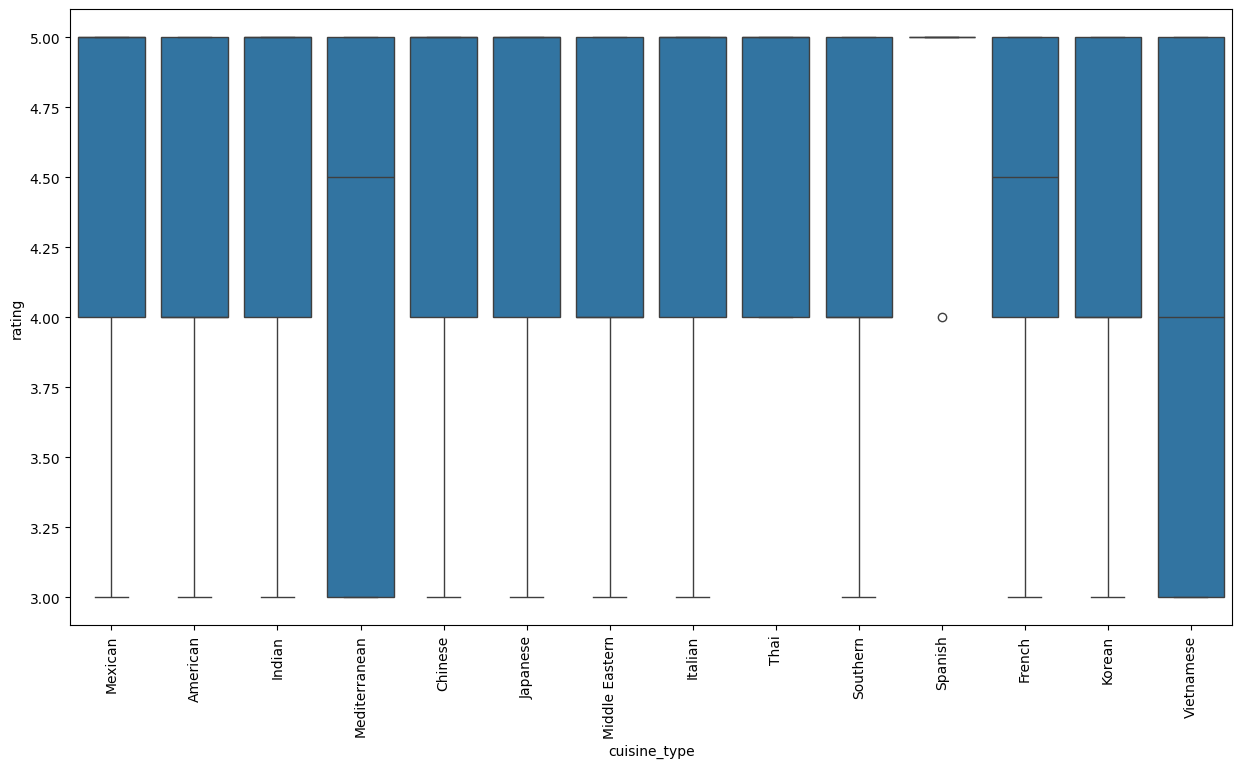

In [ ]:
# Visual on cuisine type and rating
plt.figure(figsize=(15,8))
sns.boxplot(data=df_rated,x='cuisine_type',y='rating')
plt.xticks(rotation=90);

- The median rating for all cuisine types are 4 or above.
- Mediterranean and French cuisines both have a median rating of 4.5 out of 5. Spanish cuisine has a 5 out of 5 rating and a few outliers at 4.
- All the rated orders for Thai food are 4 or above out of 5.

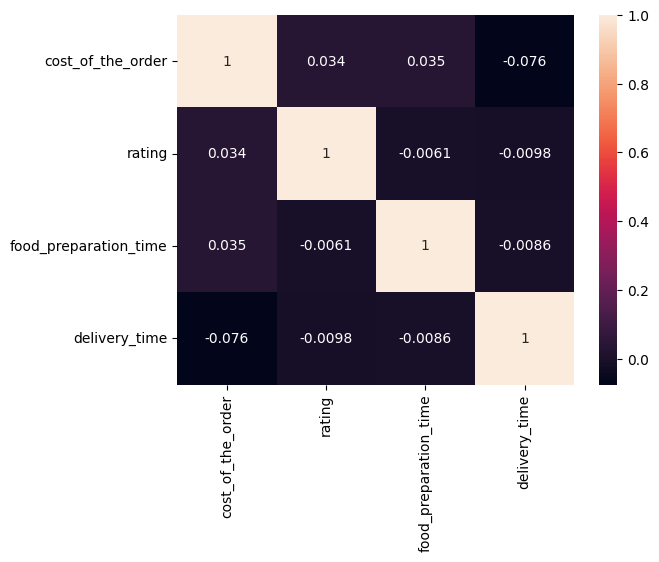

In [ ]:
# Visual of correlation in numerical values in the data
sns.heatmap(data=df_rated[['cost_of_the_order','rating','food_preparation_time','delivery_time']].corr(),annot=True);

- There is no clear correlation between the cost, rating, time to prepare the order, or time to deliver the food.

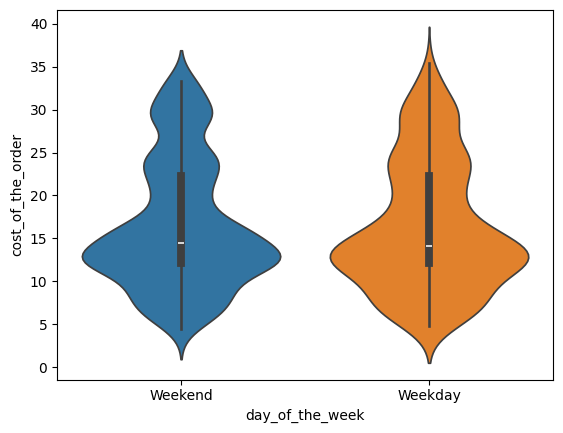

In [ ]:
# Visual on relationship between the cost and day of the week
sns.violinplot(data=df,x='day_of_the_week',y='cost_of_the_order',hue='day_of_the_week');

- There is no clear relation between the cost of the order and the day of the week.
- Most of the orders cost between 10 and 15 dollars during the weekdays and weekends.

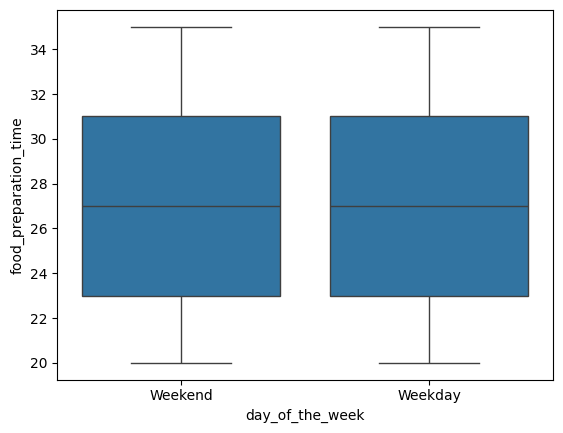

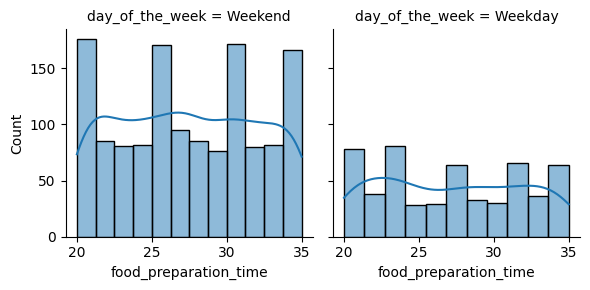

In [ ]:
# Visual on correlation between the day of the week and preparation time
sns.boxplot(data=df,x='day_of_the_week',y='food_preparation_time')
plt.show()
g = sns.FacetGrid(df, col="day_of_the_week")
g.map(sns.histplot, "food_preparation_time",kde=True);

- There is no significant correlation between preparation time and day of the week.
- Restaurants take about the same time to prepare the food during the weekdays and weekends.

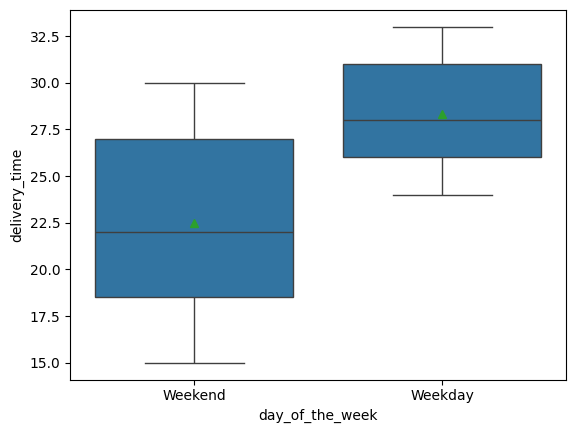

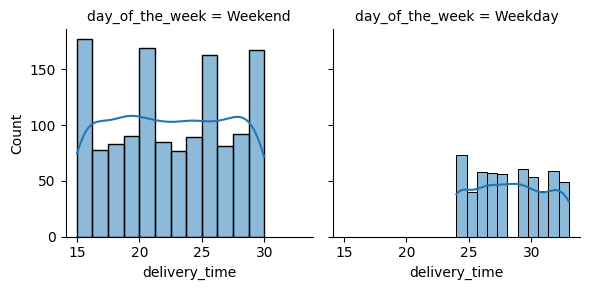

In [ ]:
# Visual on correlation between the day of the week and delivery time
sns.boxplot(data=df,x='day_of_the_week',y='delivery_time',showmeans=True)
plt.show()
g = sns.FacetGrid(df, col="day_of_the_week")
g.map(sns.histplot, "delivery_time",kde=True);

- Orders take longer to be delivered during the weekdays. This could be due to having less delivery people available during the weekdays or traffic due to people traveling from school/work.
- The median and mean of time are very close. On average, it takes about 5 minutes longer to deliver food on weekdays than on weekends.
- On the weekend it takes between 15 and 30 minutes to deliver the order. 50% of the orders are delivered between 18 and 27 minutes.
- During the weekdays it takes between 24 and 35 minutes to deliver the food. 50% of the orders take between 26 and 31 minutes to deliver.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# printing the dataframe created earlier where only rated orders are included
df_rated

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
...,...,...,...,...,...,...,...,...,...
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3,33,30
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19


In [ ]:
# Adding the total number of reviews per restaurant
total_rating=df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index()

# Filtering the new dataframe where only restaurants with more than 50 reviews appear
more_rated=total_rating[total_rating['rating']>50]
more_rated

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64


In [ ]:
# Creating a dataframe where the average rating per restaurant appears
avg_rating = df_rated.groupby(['restaurant_name'])['rating'].mean().sort_values().reset_index()
avg_rating

,restaurant_name,rating
0,Sarabeth's West,3.0
1,Nha Trang One,3.0
2,Haveli Indian Restaurant,3.0
3,Woorijip,3.0
4,brgr,3.0
...,...,...
151,Hot Kitchen,5.0
152,Haru Gramercy Park,5.0
153,Grand Sichuan International,5.0
154,El Parador Cafe,5.0


In [ ]:
# Merging both dataframes so the average rating and restaurants with at least 50 reviews appear
avg_rating.merge(more_rated, on = 'restaurant_name', how = 'inner')

,restaurant_name,rating_x,rating_y
0,Blue Ribbon Sushi,4.219178,73
1,Shake Shack,4.278195,133
2,Blue Ribbon Fried Chicken,4.328125,64
3,The Meatball Shop,4.511905,84


#### Observations:
- 156 restaurants out of the 178 have received at least one rating.
- Only 4 out of the 156 reviewed restaurants received at least 50 reviews and all 4 restaurants have an average rating of at least a 4.
- The Meathball Shop, Blue Ribbon Fried Chicken, Shake Shack, Blue Ribbon Sushi are the 4 restaurants that meet the criteria set by the company.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# function to determine the net revenue
def compute_rev(x)
  if x > 20:
    return x*0.25
  elif x > 5:
    return x*0.15
  else:
    return x*0
df['Revenue']=df['cost_of_the_order'].apply(compute_rev)
df.head()

In [ ]:
# Creating a dataframe that only has orders that cost more than 20 dollars
cost_more_20 = df[df['cost_of_the_order']>20]

# Adding a new column to the data with the company charges for the orders
cost_more_20['company_charges'] = cost_more_20['cost_of_the_order']*0.25
cost_more_20

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,company_charges
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,6.3050
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17,6.0750
17,1477373,139885,Blue Ribbon Sushi Izakaya,Japanese,33.03,Weekend,Not given,21,22,8.2575
...,...,...,...,...,...,...,...,...,...,...
1884,1477437,304993,Shake Shack,American,31.43,Weekend,3,31,24,7.8575
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29,7.2625
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21,7.2875
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,5.5775


In [ ]:
# Creating a dataset that only includes orders with costs between 5 and 20 dollars
cost_15_20 = df[df['cost_of_the_order'].between(5,20)]

# Adding a column to the data with the company charges for the orders
cost_15_20['company_charges'] = cost_15_20['cost_of_the_order']*0.15
cost_15_20

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,company_charges
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21,0.9105
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,0.8955
...,...,...,...,...,...,...,...,...,...,...
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22,2.3505
1891,1476981,138586,Shake Shack,American,5.82,Weekend,Not given,22,28,0.8730
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,1.8270
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31,1.8270


In [ ]:
# Creating a dataset that includes all orders with cost over 5 dollars
new_df=pd.concat([cost_more_20,cost_15_20],axis=0)
new_df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,company_charges
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,6.3050
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17,6.0750
17,1477373,139885,Blue Ribbon Sushi Izakaya,Japanese,33.03,Weekend,Not given,21,22,8.2575
...,...,...,...,...,...,...,...,...,...,...
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22,2.3505
1891,1476981,138586,Shake Shack,American,5.82,Weekend,Not given,22,28,0.8730
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,1.8270
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31,1.8270


In [ ]:
# Cheking how many orders there are in total to calculate how many cost less than 5 dollars
df.shape

(1898, 9)

In [ ]:
# Adding the company charges from all orders that cost more than 5 dollars
new_df['company_charges'].sum()

6166.303

#### Observations:
- The total revenue generated by the company is 6166.303 dollars based on a 25% added to orders with cost over 20 dollars and 15% applied to orders between 5 and 20 dollars.
- There are 9 orders without surcharges out of the 1898 total orders. 1889 orders cost more than 5 dollars.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Creating a column with the total time that takes to deliver the food since the order is placed
df['total_time']=df['food_preparation_time']+df['delivery_time']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


In [ ]:
# Printing the dataframe with the new column with total time
df[df['total_time']>60]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,63
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,Not given,34,28,62
19,1477354,67487,Blue Ribbon Sushi,Japanese,16.20,Weekend,4,35,26,61
24,1476714,363783,Cafe Mogador,Middle Eastern,15.86,Weekday,Not given,32,29,61
54,1477760,130507,Jack's Wife Freda,Mediterranean,22.75,Weekend,3,35,29,64
...,...,...,...,...,...,...,...,...,...,...
1869,1476923,50199,J. G. Melon,American,19.40,Weekday,4,35,26,61
1873,1478148,261371,Shake Shack,American,22.31,Weekend,Not given,35,28,63
1875,1478039,292343,Amy Ruth's,Southern,12.23,Weekday,Not given,32,33,65
1880,1477466,222734,Shake Shack,American,13.97,Weekend,5,35,27,62


In [ ]:
# Looking at the shape of the data where total time is more than 60 minutes
df[df['total_time']>60].shape

(200, 10)

In [ ]:
# Looking at the shape of the entire dataset
df.shape

(1898, 10)

#### Observations:
- 200 out of the 1898 orders take more than 60 minutes to be delivered since the order is placed.
- Around 10.5% of the orders take more than 60 minutes in total to be delivered.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

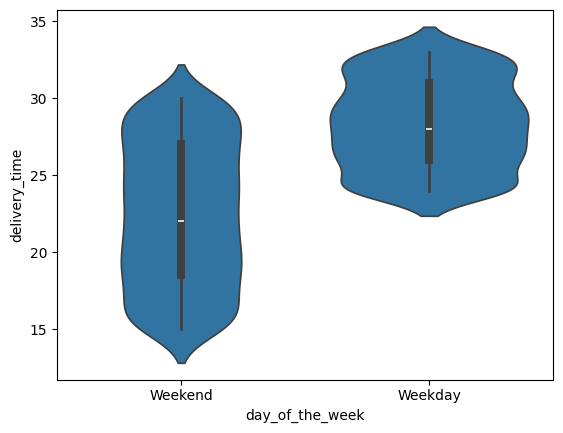

In [ ]:
# Creating a visual on delivery time based on the day of the week
sns.violinplot(data=df,x='day_of_the_week',y='delivery_time');

In [ ]:
# Printing the average time it takes to deliver the food during the weekdays and weekends
df.groupby(['day_of_the_week'])['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:
- On average it takes around 28 minutes to deliver food during the weekdays and 22 minutes on the weekends.
- On average it takes around 6 more minutes to deliver food during the weekdays.
- There is a bigger variation on delivery time on the weekends, varying from less than 10 minutes to around 33 minutes.
- During the weekdays it takes between 23 and 35 minutes to deliver food.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
The data analyzed consisted on 1898 orders placed in restaurants in New York through the app FoodHub. There were a total of 178 participating restaurants and 1200 customers.
* The majority of the orders (1351 orders) are placed during the weekends.
* Delivery times are longer during the weekdays. This could be due to having less delivery people available during the weekdays or the traffic during delivery times.
* Out of the 14 cuisine types, the most common is American (584 orders), with Shake Shack being the most common restaurant.
* The company had a revenue of 6166.303 dollars.
* 736 orders didn't receive a rating.

### Recommendations:

* The app can send reminders to rate the orders and give incentives like discounts to customers that rate all their orders.
* Hire more people to deliver food during the weekdays or increase their availability.
* The company can charge an extra fee if the delivery distance is more than a set amount of miles.
* To increase orders during the weekdays, the company could offer promotions on specific cuisine types on different days.
* We should further analyze delivery times during the weekdays to determine why delivery times are longer. It could be due to availability of delivery people or traffic during delivery times.
* Provide the customer with warnings before the order is placed if the total time (food preparation and delivery) take more than 60 minutes.
* The company should focus on restaurants for American, Japanese, Italian, and Chinese cuisines as they are the highest demand.
* To further expand the analysis, we could look at specific order amounts per weekday and look at canceled orders.

---